In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv(r"train.csv")

In [ ]:
df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


# Column Name	Description
**ACTION**

ACTION is 1 if the resource was approved, 0 if the resource was not,

RESOURCE An ID for each resource MGR_ID	The EMPLOYEE ID of the manager of the current EMPLOYEE ID record; an employee may have only one manager at a time

ROLE_ROLLUP_1	Company role grouping category id 1 (e.g. US Engineering)

ROLE_ROLLUP_2	Company role grouping category id 2 (e.g. US Retail)

ROLE_DEPTNAME	Company role department description (e.g. Retail)

ROLE_TITLE	Company role business title description (e.g. Senior Engineering
Retail Manager)

ROLE_FAMILY_DESC	Company role family extended description (e.g. Retail
Manager, Software Engineering)

ROLE_FAMILY	Company role family description (e.g. Retail Manager)

ROLE_CODE	Company role code; this code is unique to each role (e.g. Manager)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
allcolumns=df.columns
for item in allcolumns:
    print('Unique ID ', item, ' = ', df[item].nunique())

columns  ACTION  =  2
columns  RESOURCE  =  7518
columns  MGR_ID  =  4243
columns  ROLE_ROLLUP_1  =  128
columns  ROLE_ROLLUP_2  =  177
columns  ROLE_DEPTNAME  =  449
columns  ROLE_TITLE  =  343
columns  ROLE_FAMILY_DESC  =  2358
columns  ROLE_FAMILY  =  67
columns  ROLE_CODE  =  343


In [ ]:
correl=df.corr()

In [ ]:
correl

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
ACTION,1.000000,0.000185,-0.005167,-0.013702,0.005179,0.001025,-0.010169,0.003565,0.000502,0.017147
RESOURCE,0.000185,1.000000,0.011088,-0.005016,0.013438,0.030004,0.002936,0.021029,0.031060,0.007733
MGR_ID,-0.005167,0.011088,1.000000,-0.007132,-0.000364,-0.009551,0.017864,-0.018488,-0.118254,-0.004067
ROLE_ROLLUP_1,-0.013702,-0.005016,-0.007132,1.000000,0.033358,-0.009548,0.010207,-0.007546,0.029468,-0.024927
ROLE_ROLLUP_2,0.005179,0.013438,-0.000364,0.033358,1.000000,-0.006056,0.008305,0.018873,0.069558,0.015117
ROLE_DEPTNAME,0.001025,0.030004,-0.009551,-0.009548,-0.006056,1.000000,-0.006932,-0.002877,0.031669,0.010319
ROLE_TITLE,-0.010169,0.002936,0.017864,0.010207,0.008305,-0.006932,1.000000,0.170692,-0.012450,0.155920
ROLE_FAMILY_DESC,0.003565,0.021029,-0.018488,-0.007546,0.018873,-0.002877,0.170692,1.000000,-0.180596,0.092980
ROLE_FAMILY,0.000502,0.031060,-0.118254,0.029468,0.069558,0.031669,-0.012450,-0.180596,1.000000,-0.148625
ROLE_CODE,0.017147,0.007733,-0.004067,-0.024927,0.015117,0.010319,0.155920,0.092980,-0.148625,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


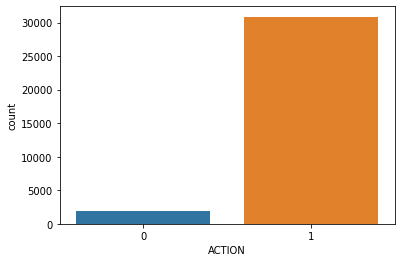

In [ ]:
sns.countplot(df["ACTION"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop("ACTION",axis=1)

In [ ]:
y=df["ACTION"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
predictedvalues=model.predict(x_test)
print(accuracy_score(y_test,predictedvalues))
print(confusion_matrix(y_test, predictedvalues))

0.939985759332723
[[   0  590]
 [   0 9241]]


# Logistic Regression give accuracy of 93.9% but if we look into its confusion matrix, then we can reach to the conclusion that its not good model as it predicts everything as class 1 and has not predicted any itema as class 0, so it is affected by the biasness of model

In [ ]:
#Lets try random forest classifier.
model = RandomForestClassifier()
model.fit(x_train, y_train)
predictedvalues=model.predict(x_test)
print(accuracy_score(y_test,predictedvalues))
print(confusion_matrix(y_test, predictedvalues))

0.9490387549588037
[[ 214  376]
 [ 125 9116]]


# even though improvement in accuracy from logistic regression to random forest is little but here we can see that confusion metrics shows that it has also classfied well better the the class which is having less number of examples in dataset which makes it really good method

In [ ]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)
predictedvalues=model.predict(x_test)
print(accuracy_score(y_test,predictedvalues))
print(confusion_matrix(y_test, predictedvalues))

0.9400874783847014
[[   1  589]
 [   0 9241]]


# Here also problem is same as in logistic regression that it can't work well with biased class

In [ ]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
predictedvalues=model.predict(x_test)
print(accuracy_score(y_test,predictedvalues))
print(confusion_matrix(y_test, predictedvalues))

0.9405960736445936
[[   7  583]
 [   1 9240]]


# This is also not giving good result compare to random forest as here also it is able to predict corectly only 7 data points of class 0 whose elements are so less.

# Lets execute random forest on test data as we have choosen random forest as the final model

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
predictedvalues=model.predict(x_test)
print(accuracy_score(y_test,predictedvalues))
print(confusion_matrix(y_test, predictedvalues))

0.9489370359068253
[[ 213  377]
 [ 125 9116]]


In [ ]:
test_data = pd.read_csv(r"test.csv")
print (x_train.shape)
print (test_data.shape)
print (test_data.columns)
test_data.drop("id",axis=1, inplace=True)
predictedoutput = model.predict(test_data)
print (predictedoutput)

(22938, 9)
(912363, 10)
Index(['id', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')
[1 1 1 ... 1 1 1]
